In [147]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dt_apriltags import Detector
from random import randrange



def detect_lines(img, threshold1 = 50, threshold2 = 150, apertureSize = 3,  minLineLength = 100, maxLineGap = 10):

    img = cv2.imread(img)
    img = cv2.resize(img, (640, 480))
    height, width = img.shape[:2]
    img = img[height//3: :]  # This slices the top half of the image

    img = cv2.GaussianBlur(img, (5, 5), 0)
    img = cv2.blur(img, (5, 5))

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
    edges = cv2.Canny(gray, threshold1, threshold2, apertureSize=apertureSize) # detect edges
    lines = cv2.HoughLinesP(
                    edges,
                    1,
                    np.pi/180,
                    100,
                    minLineLength=minLineLength,
                    maxLineGap=maxLineGap,
            ) # detect lines

    return img, lines


def draw_lines(img, lines, color = (255, 0, 255)):
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (randrange(255),randrange(255),randrange(255)), 2)
    plt.imshow(img)

def get_slopes_intercepts(lines):
    slopes = []
    intercepts = []
    for line in lines:
        
        # print("SIGMA", line[0][0], line[0][1], line[0][2], line[0][3])
        x1 = line[0][0]
        y1 = line[0][1]
        x2 = line[0][2]
        y2 = line[0][3]

        if x2 - x1 == 0:
            denominator = 0.0000001
        elif x2 - x1 != 0:
            denominator = x2 -x1

        slope = float((y2-y1)/(denominator))

        if slope == 0:
            slope == 0.000001

        intercept = float(x2-y2/slope)
        slopes.append(slope)
        intercepts.append(intercept)

    return slopes, intercepts



def detect_lanes(lines):
    slopes, intercepts = get_slopes_intercepts(lines)
    pairs = []
    EPSILON = 4

    for i in range(len(slopes)):
        for j in range(i + 1, len(slopes)):
            if abs(slopes[i] - slopes[j]) <= EPSILON:
                pairs.append([lines[i], lines[j]])

    return pairs


def draw_lanes(img, lanes):
    if len(lanes) <= 0:
        pass
    else:
        for lane in lanes:
            if len(lane) == 2:
                line1, line2 = lane
                x1, y1, x2, y2 = line1[0]
                x3, y3, x4, y4 = line2[0]
                cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.line(img, (x3, y3), (x4, y4), (255, 0, 0), 2)
    plt.imshow(img)

TypeError: 'NoneType' object is not iterable

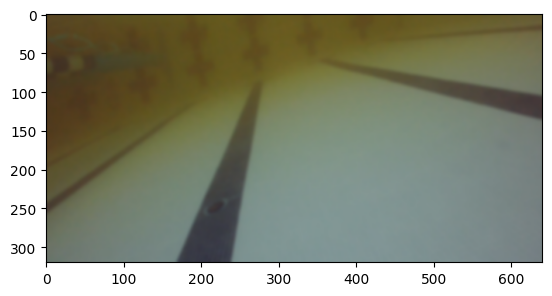

In [159]:
img, lines = detect_lines("pool_test.png", 300, 200, 3, 2000, 1800)
plt.imshow(img)
draw_lines(img, lines)
lanes = detect_lanes(lines)
draw_lanes(img, lanes)

/tmp/ipykernel_15213/1805306612.py:60: RuntimeWarning: divide by zero encountered in divide
  intercept = float(x2-y2/slope)


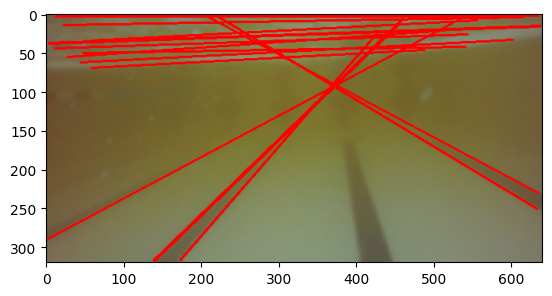

In [151]:
img, lines = detect_lines("image copy.png", 100, 200, 5, 100, 600)
plt.imshow(img)
draw_lines(img, lines)
lanes = detect_lanes(lines)
# print (lanes)
draw_lanes(img, lanes)
# img99, lines99 = detect_lines("pool_test.png", 100, 105, 3, 100, 1800)
slopes, intercepts = get_slopes_intercepts(lines)
# print((slopes))

def return_slopes99(slopes99):
    return slopes99


In [ ]:
# img, lines = detect_lines("pool_test.png")
# draw_lines(img, lines)
# lanes = detect_lanes(lines)
# print (lanes)
# #draw_lanes(img, lanes)
